### CIS Interaction 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.fftpack import fft
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("mprobc_chr1_100kb.csv",delimiter=',', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954
0,chr1-0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr1-100000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr1-200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr1-300000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr1-400000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
header = df.pop(0)
df.head()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df) 
scaled_values
# df.loc[:,:] = scaled_values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.02877162,
        0.01745562],
       [0.        , 0.        , 0.        , ..., 0.0170194 , 1.        ,
        0.01952663],
       [0.        , 0.        , 0.        , ..., 0.00520282, 0.009839  ,
        1.        ]])

### FFT 

In [7]:
N = 300

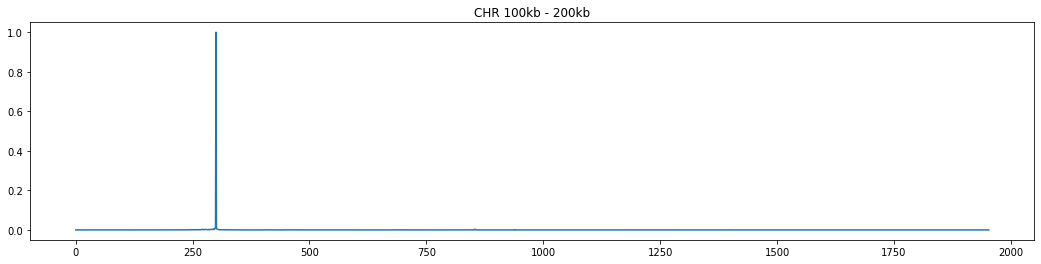

In [8]:
chr1_ = list(scaled_values[N])
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 100kb - 200kb')
ax.plot(chr1_)
plt.show()

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


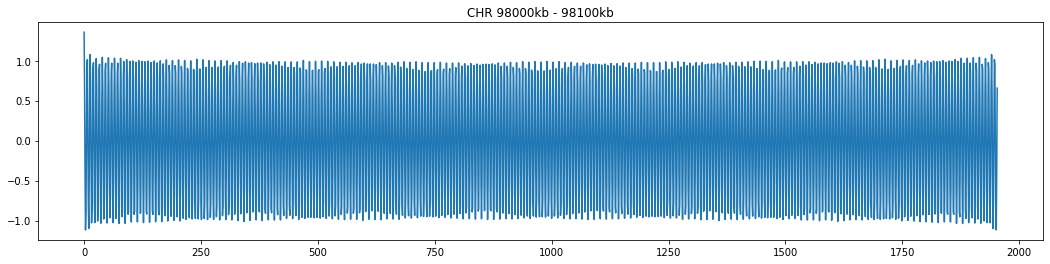

In [9]:
yf = fft(chr1_)
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(yf)
plt.show()

### The above pattern are because of the peak value 

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


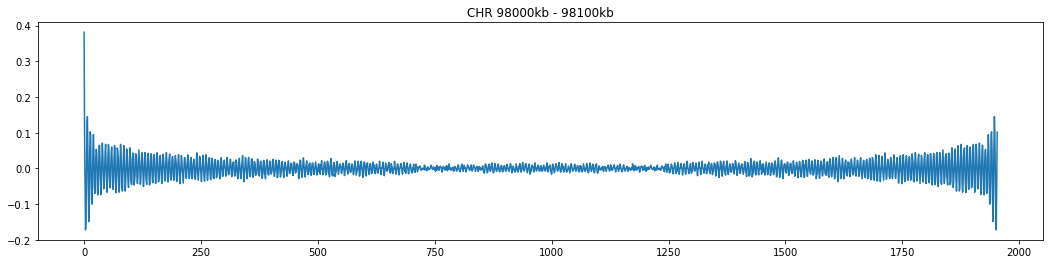

In [10]:
chr1_[N] = chr1_[N-1] + chr1_[N+1]
yf = fft(chr1_)
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(yf)
plt.show()

/Users/kumar/kumar/ChrVis/env/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


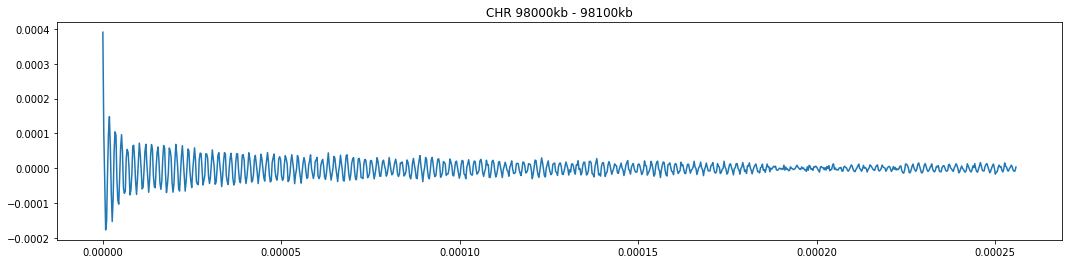

In [11]:
xf = np.linspace(0.0, 1.0/(2.0*1954), 1954//2)


fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(xf, 2.0/1954 * yf[0:1954//2])
plt.show()

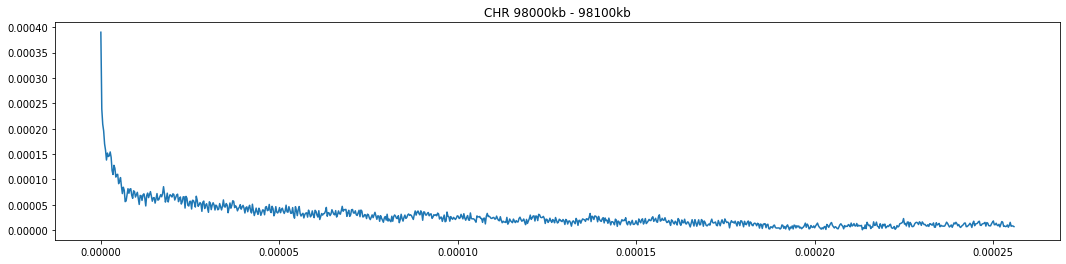

In [12]:
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(xf, 2.0/1954 * np.abs(yf[0:1954//2]))
plt.show()

### Wavelet Transformation

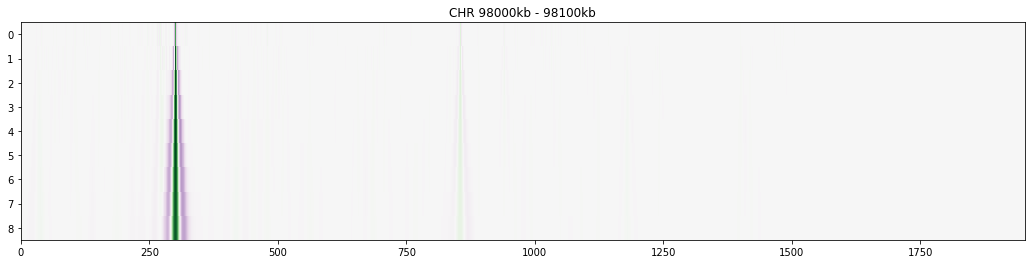

In [33]:
from scipy import signal
import matplotlib.pyplot as plt

widths = np.arange(1, 10)
cwtmatr = signal.cwt(chr1_, signal.ricker, widths)

fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.imshow(cwtmatr, cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

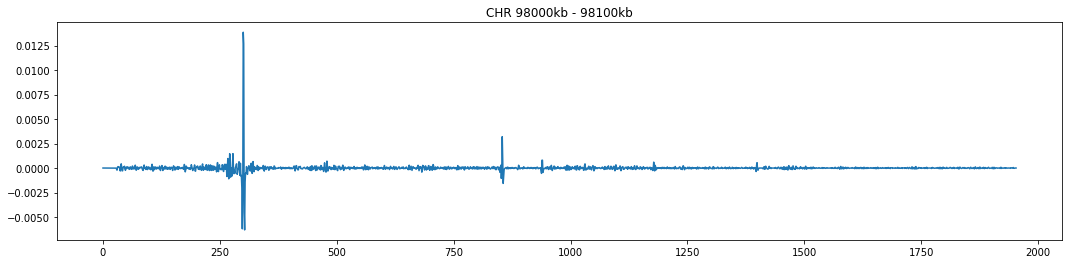

In [36]:
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(cwtmatr[0])
plt.show()

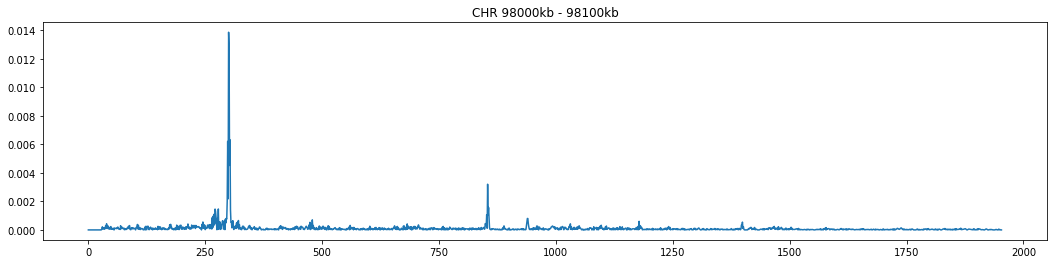

In [35]:
fig,ax = plt.subplots(figsize=(18,4))
ax.set_title('CHR 98000kb - 98100kb')
ax.plot(np.abs(cwtmatr[0]))
plt.show()